Epoch 1/200
25/25 - 8s - loss: 0.0923 - val_loss: 0.0432 - 8s/epoch - 302ms/step
Epoch 2/200
25/25 - 0s - loss: 0.0394 - val_loss: 0.0323 - 151ms/epoch - 6ms/step
Epoch 3/200
25/25 - 0s - loss: 0.0244 - val_loss: 0.0183 - 164ms/epoch - 7ms/step
Epoch 4/200
25/25 - 0s - loss: 0.0098 - val_loss: 0.0073 - 179ms/epoch - 7ms/step
Epoch 5/200
25/25 - 0s - loss: 0.0038 - val_loss: 0.0050 - 174ms/epoch - 7ms/step
Epoch 6/200
25/25 - 0s - loss: 0.0026 - val_loss: 0.0036 - 167ms/epoch - 7ms/step
Epoch 7/200
25/25 - 0s - loss: 0.0021 - val_loss: 0.0030 - 195ms/epoch - 8ms/step
Epoch 8/200
25/25 - 0s - loss: 0.0018 - val_loss: 0.0027 - 162ms/epoch - 6ms/step
Epoch 9/200
25/25 - 0s - loss: 0.0017 - val_loss: 0.0024 - 156ms/epoch - 6ms/step
Epoch 10/200
25/25 - 0s - loss: 0.0015 - val_loss: 0.0023 - 178ms/epoch - 7ms/step
Epoch 11/200
25/25 - 0s - loss: 0.0015 - val_loss: 0.0023 - 156ms/epoch - 6ms/step
Epoch 12/200
25/25 - 0s - loss: 0.0014 - val_loss: 0.0021 - 166ms/epoch - 7ms/step
Epoch 13/200
2

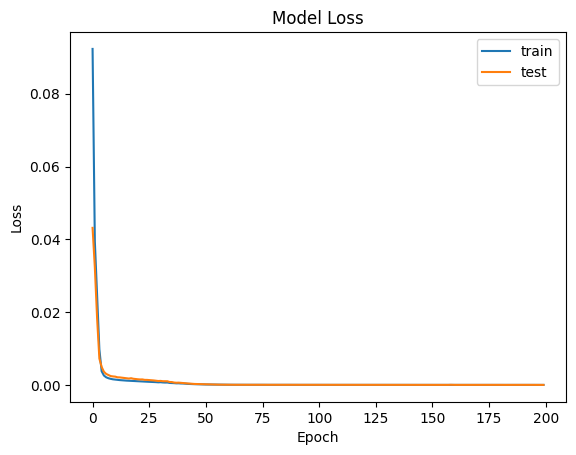

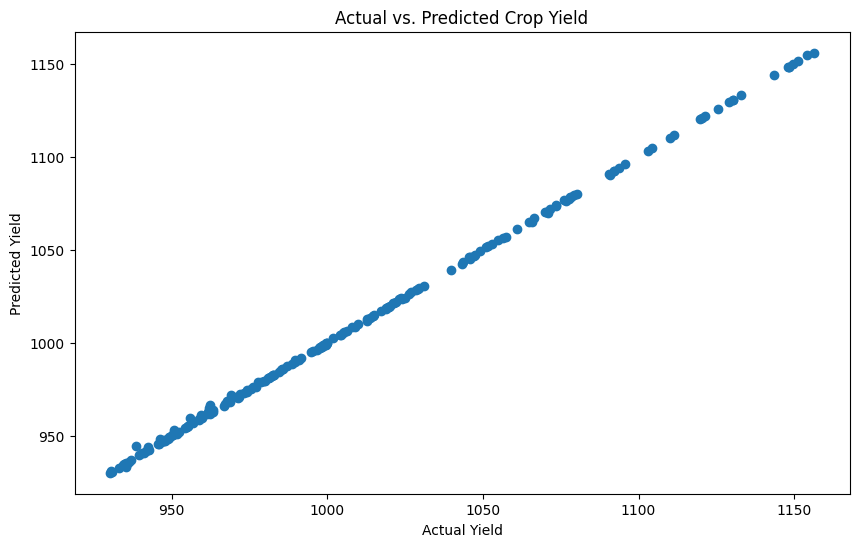

In [9]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from keras.optimizers import Adam

# Load the dataset
dataset = pd.read_csv("crop_yield_data.csv")

# Extract features and target variable
X = dataset.drop(columns=['yield'])
y = dataset['yield'].values.reshape(-1, 1)  # Reshape to a 2D array for MinMaxScaler

# Normalize the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input to be 3D [samples, time steps, features] expected by LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model with a lower learning rate
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=2, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print("Test loss:", score)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions = scaler_y.inverse_transform(predictions)
y_test = scaler_y.inverse_transform(y_test)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

# Plot loss during training
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

# Plot predicted vs. actual yield
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs. Predicted Crop Yield")
plt.show()
